## Linear Regression ##
Richard Sowers 2018-05-16
Pavle Coric 2018-05-17

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

See <https://www.tensorflow.org/api_guides/python/regression_examples>

In [1]:
import numpy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
numpy.random.seed(0)
#tf.set_random_seed(0)
N=100
err_scale=0.1
M=2
B=3

In [3]:
xvals=numpy.random.normal(size=N)
yvals=M*xvals+B+numpy.random.normal(scale=err_scale,size=N)
data=[(x,y) for (x,y) in zip(xvals,yvals)]
print(data[:10])

[(1.764052345967664, 6.716419761640953), (0.4001572083672233, 3.665538510620202), (0.9787379841057392, 4.830427468362905), (2.240893199201458, 7.578726069218717), (1.8675579901499675, 6.617803639788519), (-0.977277879876411, 1.2398063588121073), (0.9500884175255894, 4.858814936975204), (-0.1513572082976979, 2.6225401022605284), (-0.10321885179355784, 2.9858564990609224), (0.41059850193837233, 3.9692484830201873)]


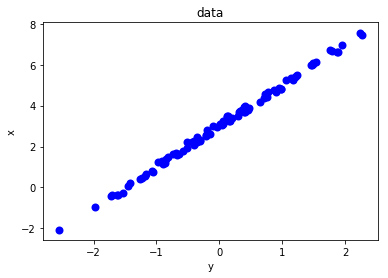

In [4]:
plt.figure()
plt.scatter(xvals,yvals,color="blue",linewidth=2)
plt.ylabel("x")
plt.xlabel("y")
plt.title("data")
plt.show()
plt.close()

### Direct conversion of minimization problem into TF ###
Comments on below:
* if normalizer is set to 1, learning_rate needs to be about 0.001 to converge in about 50 iterations
* if normalizer is set to len(data), learning rate can be set to 0.05 to converge in 50 iterations

In [5]:
CTR=50
normalizer=len(data)
m = tf.Variable(0, name='m', dtype=tf.float32)
b = tf.Variable(0, name='b', dtype=tf.float32)
error=yvals-(xvals*m+b)
loss = tf.square(error,name="loss")/normalizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    print("starting at [m,b]="+str(session.run([m,b])))
    
    for ctr in range(CTR):  
        session.run(optimizer)
        print("ctr="+str(ctr)+"; [m,b]="+str(session.run([m,b])))
        
session.close()

starting at [m,b]=[0.0, 0.0]
ctr=0; [m,b]=[0.22303732, 0.31278175]
ctr=1; [m,b]=[0.42146742, 0.5929514]
ctr=2; [m,b]=[0.59799385, 0.8439173]
ctr=3; [m,b]=[0.7550242, 1.0687308]
ctr=4; [m,b]=[0.8947022, 1.2701238]
ctr=5; [m,b]=[1.0189369, 1.4505421]
ctr=6; [m,b]=[1.129428, 1.6121756]
ctr=7; [m,b]=[1.2276889, 1.7569848]
ctr=8; [m,b]=[1.315067, 1.8867255]
ctr=9; [m,b]=[1.3927618, 2.0029695]
ctr=10; [m,b]=[1.4618411, 2.1071243]
ctr=11; [m,b]=[1.5232555, 2.2004507]
ctr=12; [m,b]=[1.577851, 2.284077]
ctr=13; [m,b]=[1.626381, 2.359014]
ctr=14; [m,b]=[1.6695157, 2.4261672]
ctr=15; [m,b]=[1.7078515, 2.4863472]
ctr=16; [m,b]=[1.7419195, 2.5402799]
ctr=17; [m,b]=[1.772192, 2.5886154]
ctr=18; [m,b]=[1.7990894, 2.6319366]
ctr=19; [m,b]=[1.8229859, 2.6707647]
ctr=20; [m,b]=[1.8442141, 2.7055671]
ctr=21; [m,b]=[1.8630701, 2.7367623]
ctr=22; [m,b]=[1.8798174, 2.7647252]
ctr=23; [m,b]=[1.8946902, 2.7897916]
ctr=24; [m,b]=[1.9078969, 2.8122623]
ctr=25; [m,b]=[1.9196229, 2.832407]
ctr=26; [m,b]=[1.930033

### Better way of doing things (by P. Coric)  ###
Comments: session.run(optimizer) is run every time that a datapoint is added
This means that the data is repeated CTR_MAX times, so session.run(optimizer) is invoked len(data)*CTR_MAX times.

In [6]:
#Create placeholders for TensorFlow X and Y
X = tf.placeholder(tf.float32, name="X") 
Y = tf.placeholder(tf.float32, name="Y")

In [7]:
#Create slope and bias
# Step 3: create weight and bias, initialized to 0 
m = tf.Variable(0.0, name="slope") 
b = tf.Variable(0.0, name="offset") 

In [8]:
#Create prediction model
Y_predicted = X * m + b

In [9]:
#Create loss function, used mse
loss = tf.square(Y - Y_predicted, name="loss") 

In [10]:
#Create Optimizer Function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss) 

In [11]:
CTR_MAX=2
#Start Session
with tf.Session() as session: 
    # Step 7: initialize the necessary variables, in this case, w and b 
    session.run(tf.global_variables_initializer())  
 
    #Train the Model 
    N_data=len(data)
    for ctr in range(CTR_MAX): # run 100 epochs 
        for n,(x,y) in enumerate(data): # Session runs train_op to minimize loss 
            session.run(optimizer, feed_dict={X: x, Y:y})
            print("ctr="+str(ctr)+"; n="+str(n)+"; total iterations="+
                  str(ctr*N_data+n)+"; Current estimates="+str(session.run([m,b])))
session.close()

ctr=0; n=0; total iterations=0; Current estimates=[0.23696232, 0.1343284]
ctr=0; n=1; total iterations=1; Current estimates=[0.26446423, 0.20305616]
ctr=0; n=2; total iterations=2; Current estimates=[0.34997717, 0.29042676]
ctr=0; n=3; total iterations=3; Current estimates=[0.64147425, 0.42050752]
ctr=0; n=4; total iterations=4; Current estimates=[0.8282041, 0.5204936]
ctr=0; n=5; total iterations=5; Current estimates=[0.7983248, 0.5510676]
ctr=0; n=6; total iterations=6; Current estimates=[0.8657672, 0.62205297]
ctr=0; n=7; total iterations=7; Current estimates=[0.85931474, 0.6646835]
ctr=0; n=8; total iterations=8; Current estimates=[0.85433984, 0.7128809]
ctr=0; n=9; total iterations=9; Current estimates=[0.87820035, 0.77099246]
ctr=0; n=10; total iterations=10; Current estimates=[0.88562536, 0.8225395]
ctr=0; n=11; total iterations=11; Current estimates=[0.99872917, 0.9003129]
ctr=0; n=12; total iterations=12; Current estimates=[1.0409755, 0.95582426]
ctr=0; n=13; total iterations=

ctr=1; n=37; total iterations=137; Current estimates=[1.9691219, 2.8672028]
ctr=1; n=38; total iterations=138; Current estimates=[1.967879, 2.8704114]
ctr=1; n=39; total iterations=139; Current estimates=[1.9678152, 2.8706229]
ctr=1; n=40; total iterations=140; Current estimates=[1.968937, 2.8695529]
ctr=1; n=41; total iterations=141; Current estimates=[1.9652371, 2.8721583]
ctr=1; n=42; total iterations=142; Current estimates=[1.9623299, 2.8738623]
ctr=1; n=43; total iterations=143; Current estimates=[1.9725959, 2.8791249]
ctr=1; n=44; total iterations=144; Current estimates=[1.9690771, 2.8860292]
ctr=1; n=45; total iterations=145; Current estimates=[1.9673698, 2.8899267]
ctr=1; n=46; total iterations=146; Current estimates=[1.9679233, 2.889485]
ctr=1; n=47; total iterations=147; Current estimates=[1.9717665, 2.894428]
ctr=1; n=48; total iterations=148; Current estimates=[1.9740771, 2.8929963]
ctr=1; n=49; total iterations=149; Current estimates=[1.9738417, 2.8941028]
ctr=1; n=50; tot

### use tf.estimator.LinearRegressor ###
knowing that the result is a line y=mx+b, we know to points
* (0,b)=(0,3)
* (1,m+b)=(1,5)

In [37]:
N_steps=2500
# Create feature column and estimator
x_data =  tf.feature_column.numeric_column('x')
regressor = tf.estimator.LinearRegressor(feature_columns=[x_data])
# Train the estimator
train_input = tf.estimator.inputs.numpy_input_fn(
    x={"x": numpy.array(xvals)},
    y=numpy.array(yvals),
    shuffle=False,
    num_epochs=None)

regressor.train(train_input,steps=N_steps) ###Edited here

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\richa\\AppData\\Local\\Temp\\tmpcuoqeq9_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E4B063B780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\richa\App

In [38]:
predict_input = tf.estimator.inputs.numpy_input_fn(
     x={"x": numpy.array([0,1], dtype=numpy.float32)},
     num_epochs=1, shuffle=False)
results = regressor.predict(predict_input)
print(list(results))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\richa\AppData\Local\Temp\tmpcuoqeq9_\model.ckpt-2500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'predictions': array([3.0074613], dtype=float32)}, {'predictions': array([5.01898], dtype=float32)}]
